# Introduction to PL/pgSQL Block Structure

PL/pgSQL is a block-structured language.

```postgresql
[ <<label>> ]
[ declare
    declarations ]
begin
    statements;
	...
end [ label ]; 
```

* Each block has two sections: **Declaration** & **Body**.
* The **declaration** section is optional, whereas the **body** section is required.
* A block may have an optional `label` that is located at the beginning and end of the block.
* A block ends with a semicolon (`;`) after the end keyword.
* Typically, you use the block label when you want to specify it in the `EXIT` statement of the block body or to qualify the names of variables declared in the block.
* The declaration section is where you declare all variables used within the body section.
* Each statement in the declaration section is terminated with a semicolon (`;`).
* The body section is where you place the code.
* Each statement in the body section is terminated with a semicolon (`;`).

**The syntax for declaring a variable is as follows:**
```postgresql
variable_name type := initial_value; 
variable_name type = initial_value; 
```

**Example**:
```postgresql
counter int := 0;
counter int = 0;
max int;
```



# PL/pgSQL block structure example

The following example illustrates a simple block. Because the block has no name, it is called an **anonymous block**.

```postgresql
do $$
<<first_block>>
declare
  film_count integer := 0;
begin
   -- get the number of films
   select count(*)
   into film_count
   from film;

   -- display a message
   raise notice 'The number of films is %', film_count;
end first_block $$; 
```

> Notice that the `DO` statement does not belong to the block. It is used to execute an **anonymous block**.

The anonymous block has to be surrounded by **single quotes**.

```postgresql
'<<first_block>>
declare
  film_count integer := 0;
begin
   -- get the number of films
   select count(*)
   into film_count
   from film;
   -- display a message
   raise notice ''The number of films is %'', film_count;
end first_block'; 
```

However, we use the **dollar-quoted string** constant (**delimiter** or **block separator**) syntax to make it more readable.


# PL/pgSQL Subblocks

PL/pgSQL allows you to place a block inside the body of another block.
* The block nested inside another block is called a **subblock**. 
* The enclosing block, which contains the subblock, is often referred to as the outer block.

The following picture illustrates an outer block and subblocks:

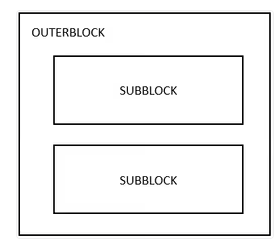

**Typically, you divide a large block into smaller, more logical subblocks.**

```postgresql
do
$$
<<outer>>
declare
   x int = 0;
begin
   x = x + 1;
   <<inner>>
   declare
       y int = 2;
   begin
   	   y = y + x;
	   raise notice 'x=% y=%', x, y;
   end inner;
end outer;
$$ 
```

**Output:**
```
NOTICE:  x=1 y=3
DO
```